**1. Importing Necessary libraries**

In [188]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [189]:
#combining no of csv file into one file with name combine_csv
#os.chdir('C:\Users\LILA\Desktop\RTT-RSS with Kalman_offset\Kalman_offset')
os.chdir('C:/Users/LILA/Desktop/RTT-RSS with Kalman_offset/Kalman_offset')

extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
df

,RTT,RSS,TRUE
0,9.892809,-72.000000,10
1,10.037249,-69.494567,10
2,10.225143,-70.335750,10
3,10.231749,-70.504328,10
4,10.272160,-69.785318,10
...,...,...,...
291,8.150844,-61.387418,9
292,8.144316,-61.276177,9
293,8.104251,-61.173856,9
294,8.146940,-61.079739,9


**2. Extracting input and output data from Dataframe**

In [190]:
input_data = df.iloc[:, :2]
output_data = df['TRUE'].values
output_data = np.array(output_data)
output_data.shape

(7394,)

In [191]:
input_data = input_data.values #conversting dataframe format to array format
#input_data = input_data.reshape(-1,1)
X=input_data

In [192]:
output_data

array([10, 10, 10, ...,  9,  9,  9], dtype=int64)

**3. Creating Multiple class using Onehot Encoder of output**

In [193]:

from sklearn.preprocessing import OneHotEncoder
# Create a one-hot encoder object
one_hot_encoder = OneHotEncoder()

# Fit and transform the one-hot encoder on your output data
output_data = np.array(output_data)
encoded_output = one_hot_encoder.fit_transform(output_data.reshape(-1,1))
# Convert the encoded output data to a NumPy array format
#encoded_output = np.array(encoded_output)
encoded_output = encoded_output.toarray()
y=encoded_output


In [194]:
#output_data=output_data.values

In [195]:
input_data

array([[  9.89280872, -72.        ],
       [ 10.03724892, -69.49456676],
       [ 10.22514268, -70.33574986],
       ...,
       [  8.10425144, -61.17385598],
       [  8.14694009, -61.0797385 ],
       [  8.20025215, -61.07334523]])

**4. Importing necessary libraries and create the DNN model**

In [196]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from keras.optimizers import Adam
from keras.layers import Dropout

optimizer = Adam(learning_rate=0.0001)

# Initialize the model
model = Sequential()

# Add the first hidden layer with 64 neurons and input shape as the shape of the input data
model.add(Dense(64, activation='relu', input_shape=(2,)))

# Add the second hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))

# Add the third hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))

# Add the fourth hidden layer with 32 neurons
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

# Add the output layer with 25 neurons for the 25 categories, and use softmax activation for multiclass classification
model.add(Dense(25, activation='softmax'))

# Compile the model, using categorical_crossentropy loss for multiclass classification, and 'adam' optimizer
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                192       
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 25)                3225      
                                                                 
Total params: 28,249
Trainable params: 28,249
Non-trainable params: 0
_________________________________________________________________


In [197]:
from sklearn.model_selection import train_test_split

# assuming your data is in X and y variables
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(input_data, encoded_output, test_size=0.3, random_state=42)

In [198]:
X_train

array([[ 22.09791381, -78.39659914],
       [  6.67610286, -62.70303998],
       [  6.69791407, -62.64872476],
       ...,
       [  2.79402896, -59.98608869],
       [ 11.90158149, -62.02017815],
       [  8.41902744, -60.63309277]])

**5. Standarizing the data- Preprocessing**

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#X_val = sc.fit_transform(X_val)
X_train.shape

(5175, 2)

In [200]:
X_train

array([[ 1.3110432 , -1.53346284],
       [-0.77980056,  0.52470931],
       [-0.77684346,  0.53183262],
       ...,
       [-1.30612072,  0.88103087],
       [-0.07134554,  0.61426498],
       [-0.54349997,  0.79617786]])

In [201]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [202]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [203]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stopping])

Epoch 1/500
162/162 [==============================] - 1s 2ms/step - loss: 3.1025 - accuracy: 0.1697 - val_loss: 2.9523 - val_accuracy: 0.1627
Epoch 2/500
162/162 [==============================] - 0s 1ms/step - loss: 2.7156 - accuracy: 0.1814 - val_loss: 2.4818 - val_accuracy: 0.2195
Epoch 3/500
162/162 [==============================] - 0s 1ms/step - loss: 2.2436 - accuracy: 0.3014 - val_loss: 2.0568 - val_accuracy: 0.3303
Epoch 4/500
162/162 [==============================] - 0s 1ms/step - loss: 1.8458 - accuracy: 0.3606 - val_loss: 1.6872 - val_accuracy: 0.3844
Epoch 5/500
162/162 [==============================] - 0s 2ms/step - loss: 1.5144 - accuracy: 0.4895 - val_loss: 1.3929 - val_accuracy: 0.5291
Epoch 6/500
162/162 [==============================] - 0s 2ms/step - loss: 1.2632 - accuracy: 0.6435 - val_loss: 1.1685 - val_accuracy: 0.7053
Epoch 7/500
162/162 [==============================] - 0s 2ms/step - loss: 1.0691 - accuracy: 0.7513 - val_loss: 0.9936 - val_accuracy: 0.7796

In [204]:
## evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

70/70 [==============================] - 0s 520us/step - loss: 0.0911 - accuracy: 0.9721
Test loss: 0.09111291170120239
Test accuracy: 0.9720594882965088


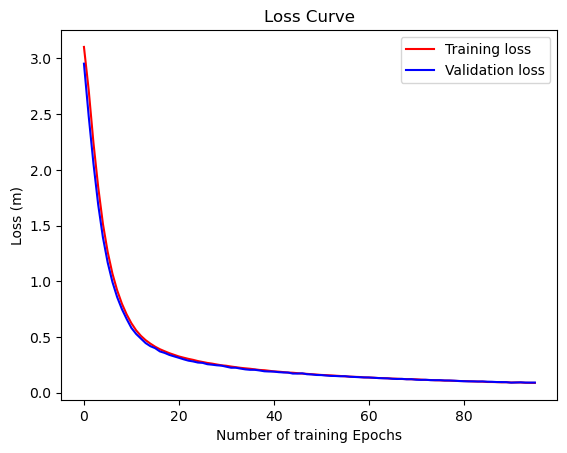

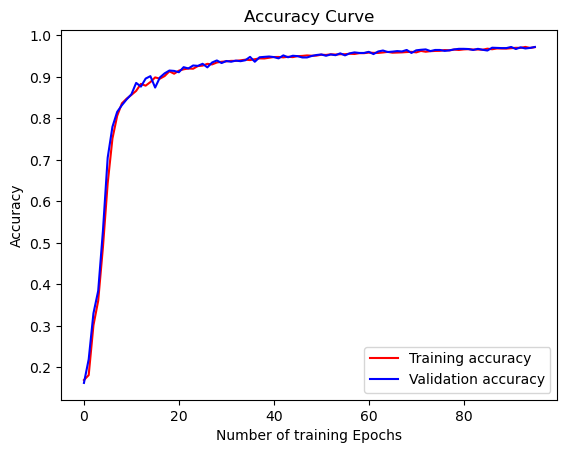

In [205]:
# Plot the loss curve
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss' )
plt.title('Loss Curve')
plt.xlabel('Number of training Epochs')
plt.ylabel('Loss (m)')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Number of training Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [206]:
y_pred = model.predict(X_test)

70/70 [==============================] - 0s 433us/step


In [207]:
y_pred

array([[3.02962516e-03, 9.96970057e-01, 2.09176818e-07, ...,
        6.37696568e-25, 5.86818952e-27, 3.52365383e-34],
       [1.79951065e-04, 9.99816835e-01, 2.49265645e-06, ...,
        1.01337004e-25, 3.07668638e-27, 1.85963838e-34],
       [7.96756619e-11, 3.76460725e-03, 7.17500865e-01, ...,
        1.58446423e-25, 3.47107426e-25, 1.76401260e-34],
       ...,
       [3.69720922e-30, 1.36059915e-38, 0.00000000e+00, ...,
        5.88829512e-17, 1.86635211e-20, 9.99587357e-01],
       [3.77936302e-20, 4.40569879e-27, 3.44362753e-37, ...,
        4.38853185e-08, 1.23839632e-13, 4.11183418e-25],
       [2.17808539e-25, 2.22242578e-25, 2.25167688e-34, ...,
        1.56709491e-23, 3.25930228e-28, 0.00000000e+00]], dtype=float32)

In [208]:
y_pred.shape

(2219, 25)

In [209]:
# Decode the one-hot encoded data
#y_pred= one_hot_encoder.inverse_transform(y_pred)
y_pred= np.argmax(y_pred, axis=1)
# Convert the decoded output data to a NumPy array format
y_pred = np.array(y_pred)

# Print the decoded output data
print(y_pred)

[ 1  1  2 ... 24 17 12]


In [210]:
y_pred=y_pred.flatten()
y_pred

array([ 1,  1,  2, ..., 24, 17, 12], dtype=int64)

In [211]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [212]:
# Decode the one-hot encoded data
#y_test= one_hot_encoder.inverse_transform(y_test)
y_test=np.argmax(y_test, axis=1)
# Convert the decoded output data to a NumPy array format
y_test = np.array(y_test)

# Print the decoded output data
print(y_test)

[ 1  1  3 ... 24 17 12]


In [213]:
y_test = y_test.flatten()
y_test

array([ 1,  1,  3, ..., 24, 17, 12], dtype=int64)

**6. Confusion Matrix and Classification Report**

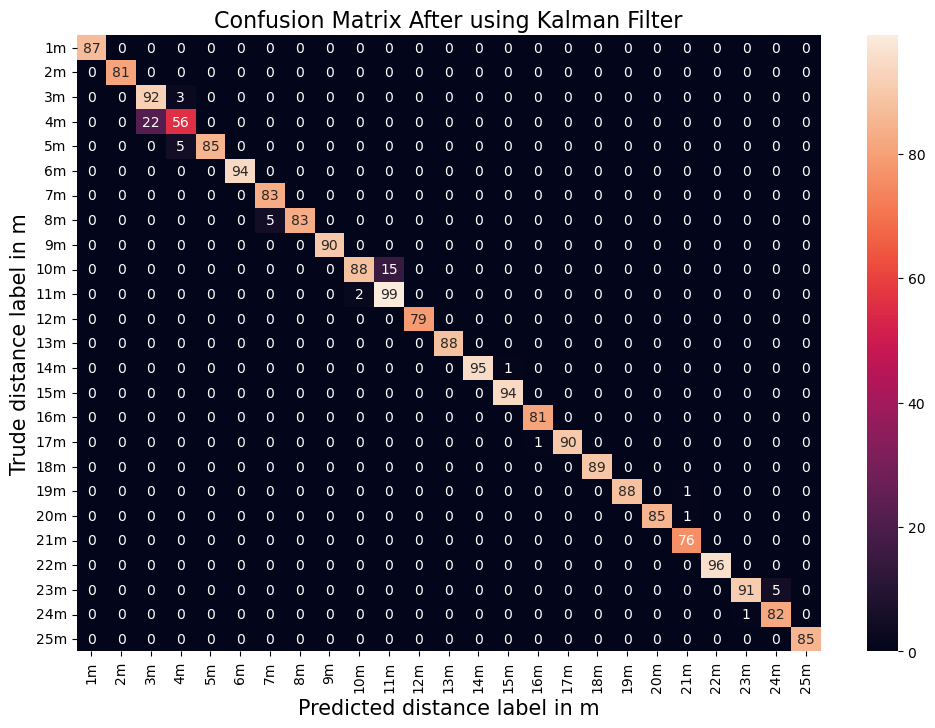

Accuracy of Model with Kalman Filter:  0.9720594862550699


In [214]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
import seaborn as sns

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
array=np.array(conf_mat)
df_cm = pd.DataFrame(array, index = [str(i)+"m" for i in range(1,26)],
                  columns = [str(i)+"m" for i in range(1,26)])

plt.figure(figsize = (12,8))

# import seaborn as sns
# sns.heatmap(df_cm, annot=True)

a=sns.heatmap(df_cm, annot=True, fmt='d')
a.set_xlabel('Predicted distance label in m', fontsize=15)
a.set_ylabel('Trude distance label in m', fontsize=15)
plt.title('Confusion Matrix After using Kalman Filter', fontsize=16)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Model with Kalman Filter: ', accuracy)

In [215]:
# Create a custom label for each class
labels = [f"{i + 1}m" for i in range(25)]

# Generate the classification report
print(classification_report(y_test, y_pred, target_names=labels))




              precision    recall  f1-score   support

          1m       1.00      1.00      1.00        87
          2m       1.00      1.00      1.00        81
          3m       0.81      0.97      0.88        95
          4m       0.88      0.72      0.79        78
          5m       1.00      0.94      0.97        90
          6m       1.00      1.00      1.00        94
          7m       0.94      1.00      0.97        83
          8m       1.00      0.94      0.97        88
          9m       1.00      1.00      1.00        90
         10m       0.98      0.85      0.91       103
         11m       0.87      0.98      0.92       101
         12m       1.00      1.00      1.00        79
         13m       1.00      1.00      1.00        88
         14m       1.00      0.99      0.99        96
         15m       0.99      1.00      0.99        94
         16m       0.99      1.00      0.99        81
         17m       1.00      0.99      0.99        91
         18m       1.00    

Precision: number of true positives divided by the number of true positives and false positives

Recall: number of true positives divided by the number of true positives and false negatives

F1-score: the harmonic mean of precision and recall

Support: number of samples in the corresponding class.



 **7.Predicting without Kalman Filter data**
 

In [216]:
#os.chdir('C:/Users/LILA/RTT-RSS with Kalman/raw_dataset')
os.chdir('C:/Users/LILA/Desktop/RTT-RSS with Kalman_offset/Offset new')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
dfff=combined_csv
dfff

,True_Range,Est_Range,stdev,RSSI,Final_range,Raw_error,Callibrated_data_error
0,10,10.178,0.674,-72,9.892809,-0.178,0.107191
1,10,10.452,0.142,-67,10.166809,-0.452,-0.166809
2,10,10.803,0.077,-72,10.517809,-0.803,-0.517809
3,10,10.530,0.194,-71,10.244809,-0.530,-0.244809
4,10,10.647,0.083,-67,10.361809,-0.647,-0.361809
...,...,...,...,...,...,...,...
291,9,8.655,0.125,-60,8.246145,0.345,0.753855
292,9,8.538,0.173,-60,8.129145,0.462,0.870855
293,9,8.420,0.182,-60,8.011145,0.580,0.988855
294,9,8.655,0.112,-60,8.246145,0.345,0.753855


In [217]:
dfff.drop(['Raw_error','Callibrated_data_error','stdev','Est_Range'],axis=1,inplace=True)
dfff

,True_Range,RSSI,Final_range
0,10,-72,9.892809
1,10,-67,10.166809
2,10,-72,10.517809
3,10,-71,10.244809
4,10,-67,10.361809
...,...,...,...
291,9,-60,8.246145
292,9,-60,8.129145
293,9,-60,8.011145
294,9,-60,8.246145


In [218]:
X_valid = dfff.iloc[:,-2:].values
y_valid = dfff['True_Range'].values
X_valid

array([[-72.        ,   9.89280872],
       [-67.        ,  10.16680872],
       [-72.        ,  10.51780872],
       ...,
       [-60.        ,   8.01114527],
       [-60.        ,   8.24614527],
       [-61.        ,   8.32414527]])

In [219]:
X_valid = sc.fit_transform(X_valid)

In [220]:
# Fit and transform the one-hot encoder on your output data
output_data = np.array(y_valid)
encoded_output = one_hot_encoder.fit_transform(output_data.reshape(-1,1))
# Convert the encoded output data to a NumPy array format
#encoded_output = np.array(encoded_output)
encoded_output = encoded_output.toarray()
y=encoded_output

In [221]:
XX_train, XX_test, yy_train, yy_test = train_test_split(X_valid, y, test_size=0.3, random_state=42)
XX_train.shape
yy_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
yy_test.shape

(2219, 25)

In [223]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')
historyy = model.fit(XX_train, yy_train, validation_data=(XX_test, yy_test), epochs=500, callbacks=[early_stopping]) 

Epoch 1/500
162/162 [==============================] - 0s 1ms/step - loss: 13.6195 - accuracy: 0.1712 - val_loss: 3.0530 - val_accuracy: 0.3312
Epoch 2/500
162/162 [==============================] - 0s 1ms/step - loss: 1.8116 - accuracy: 0.5146 - val_loss: 1.1744 - val_accuracy: 0.6652
Epoch 3/500
162/162 [==============================] - 0s 962us/step - loss: 1.0364 - accuracy: 0.7071 - val_loss: 0.9444 - val_accuracy: 0.7274
Epoch 4/500
162/162 [==============================] - 0s 968us/step - loss: 0.8931 - accuracy: 0.7498 - val_loss: 0.8445 - val_accuracy: 0.7598
Epoch 5/500
162/162 [==============================] - 0s 968us/step - loss: 0.8194 - accuracy: 0.7712 - val_loss: 0.7858 - val_accuracy: 0.7715
Epoch 6/500
162/162 [==============================] - 0s 979us/step - loss: 0.7674 - accuracy: 0.7822 - val_loss: 0.7420 - val_accuracy: 0.7810
Epoch 7/500
162/162 [==============================] - 0s 969us/step - loss: 0.7282 - accuracy: 0.7930 - val_loss: 0.7032 - val_accur

In [224]:
y_pred_valid = model.predict(XX_test)
y_pred_valid

70/70 [==============================] - 0s 390us/step


array([[9.7031367e-01, 2.9659983e-02, 2.8927711e-06, ..., 2.1176347e-26,
        1.0219909e-28, 1.4373569e-20],
       [5.2035591e-03, 9.9026102e-01, 3.0369693e-03, ..., 2.4451590e-29,
        1.1506551e-33, 1.7555980e-25],
       [5.2556788e-06, 5.4366332e-02, 5.9311861e-01, ..., 5.4858748e-29,
        1.2212351e-33, 3.6713112e-31],
       ...,
       [5.6141040e-11, 2.7605513e-21, 4.2756645e-33, ..., 1.1605655e-12,
        8.4411853e-11, 9.9829549e-01],
       [7.0797193e-21, 2.7165223e-28, 0.0000000e+00, ..., 1.4359131e-08,
        7.0594085e-22, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6665268e-35,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

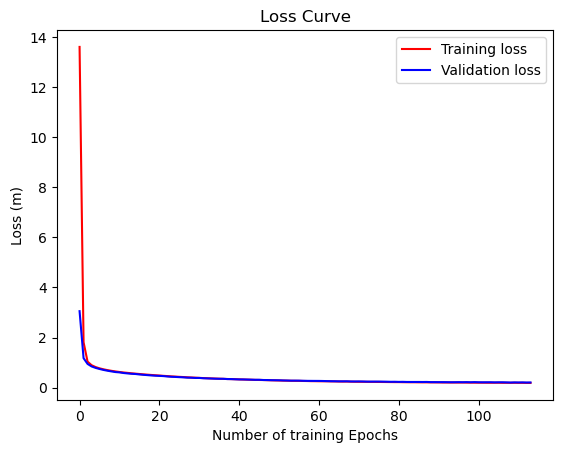

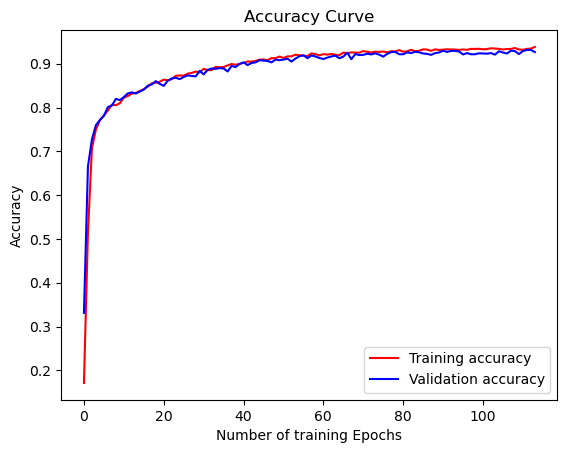

In [225]:
# Plot the loss curve
plt.plot(historyy.history['loss'], 'r', label='Training loss')
plt.plot(historyy.history['val_loss'], 'b', label='Validation loss')
plt.title('Loss Curve')
plt.xlabel('Number of training Epochs')
plt.ylabel('Loss (m)')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(historyy.history['accuracy'], 'r', label='Training accuracy')
plt.plot(historyy.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Number of training Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [226]:
## evaluate the model on the test set
loss, accuracy = model.evaluate(XX_test, yy_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


70/70 [==============================] - 0s 606us/step - loss: 0.2022 - accuracy: 0.9265
Test loss: 0.20221513509750366
Test accuracy: 0.9265434741973877


In [227]:
# Decode the one-hot encoded data
y_pred_valid= one_hot_encoder.inverse_transform(y_pred_valid)
#y_pred_valid= np.argmax(y_pred_valid,axis=1)
# Convert the decoded output data to a NumPy array format
y_pred_valid = np.array(y_pred_valid)

# Print the decoded output data
print(y_pred_valid)

[[ 1]
 [ 2]
 [ 3]
 ...
 [25]
 [18]
 [13]]


In [228]:
y_pred_valid.flatten()

array([ 1,  2,  3, ..., 25, 18, 13], dtype=int64)

In [229]:
yy_test=one_hot_encoder.inverse_transform(yy_test)
yy_test=yy_test.flatten()
yy_test

array([ 2,  2,  4, ..., 25, 18, 13], dtype=int64)

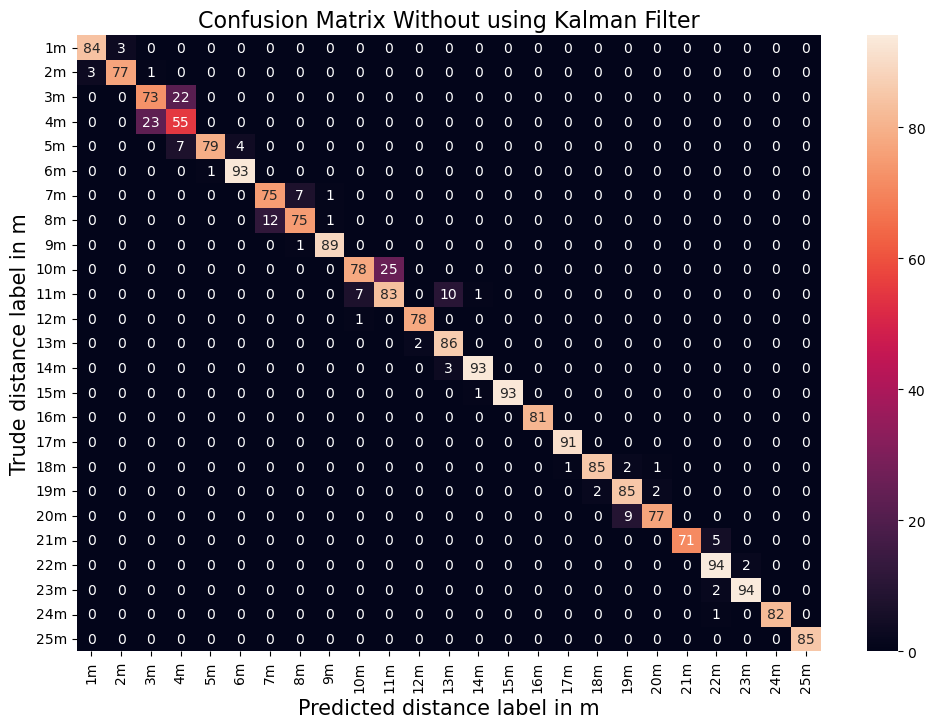

Accuracy without Kalman Filter:  0.9265434880576836


In [230]:
# cm = confusion_matrix(y_valid, y_pred_valid)
# print(cm)
# accuracy = accuracy_score(y_valid, y_pred_valid)
# print('Accuracy: ', accuracy)

conf_mat = confusion_matrix(yy_test, y_pred_valid)
array=np.array(conf_mat)
df_cm = pd.DataFrame(array, index = [str(i)+"m" for i in range(1,26)],
                  columns = [str(i)+"m" for i in range(1,26)])

plt.figure(figsize = (12,8))

# import seaborn as sns
# sns.heatmap(df_cm, annot=True)

a=sns.heatmap(df_cm, annot=True, fmt='d')
a.set_xlabel('Predicted distance label in m', fontsize=15)
a.set_ylabel('Trude distance label in m', fontsize=15)
plt.title('Confusion Matrix Without using Kalman Filter', fontsize=16)
plt.show()
accuracy = accuracy_score(yy_test, y_pred_valid)
print('Accuracy without Kalman Filter: ', accuracy)

In [231]:
# Create a custom label for each class
labels = [f"{i + 1}m" for i in range(25)]

# Generate the classification report
print(classification_report(yy_test, y_pred_valid, target_names=labels))

              precision    recall  f1-score   support

          1m       0.97      0.97      0.97        87
          2m       0.96      0.95      0.96        81
          3m       0.75      0.77      0.76        95
          4m       0.65      0.71      0.68        78
          5m       0.99      0.88      0.93        90
          6m       0.96      0.99      0.97        94
          7m       0.86      0.90      0.88        83
          8m       0.90      0.85      0.88        88
          9m       0.98      0.99      0.98        90
         10m       0.91      0.76      0.83       103
         11m       0.77      0.82      0.79       101
         12m       0.97      0.99      0.98        79
         13m       0.87      0.98      0.92        88
         14m       0.98      0.97      0.97        96
         15m       1.00      0.99      0.99        94
         16m       1.00      1.00      1.00        81
         17m       0.99      1.00      0.99        91
         18m       0.98    

**DNN Regression Approach**

In [232]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
from keras.optimizers import Adam


optimizer = Adam(learning_rate=0.0001)
#optimizer = SGD(learning_rate=0.01)

# create DNN model
model_reg = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_reg.add(Dense(units=64, input_dim=2, activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_reg.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2))


model_reg.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2))

#model_reg.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2)) 

#model.add(Dense(units=16, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2)) 

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_reg.add(Dense(1))
 
# Compiling the model
model_reg.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
 

model_reg.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                192       
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
_________________________________________________________________


In [233]:
input_data = df.iloc[:, :2]
output_data = df['TRUE'].values
output_data = np.array(output_data)
output_data

array([10, 10, 10, ...,  9,  9,  9], dtype=int64)

In [234]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

In [235]:
X_train_reg = sc.fit_transform(X_train_reg)
X_test_reg = sc.fit_transform(X_test_reg)

In [236]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list=[early_stopping]
n_epochs=200
history_reg = model_reg.fit(X_train_reg, y_train_reg, epochs=n_epochs, batch_size=64, validation_data=(X_test_reg, y_test_reg),callbacks=callbacks_list)

Epoch 1/200
81/81 [==============================] - 0s 2ms/step - loss: 216.2097 - mse: 216.2097 - val_loss: 204.8045 - val_mse: 204.8045
Epoch 2/200
81/81 [==============================] - 0s 1ms/step - loss: 181.8517 - mse: 181.8517 - val_loss: 145.2720 - val_mse: 145.2720
Epoch 3/200
81/81 [==============================] - 0s 1ms/step - loss: 101.4102 - mse: 101.4102 - val_loss: 56.9722 - val_mse: 56.9722
Epoch 4/200
81/81 [==============================] - 0s 1ms/step - loss: 37.0425 - mse: 37.0425 - val_loss: 26.0434 - val_mse: 26.0434
Epoch 5/200
81/81 [==============================] - 0s 1ms/step - loss: 21.7339 - mse: 21.7339 - val_loss: 18.3173 - val_mse: 18.3173
Epoch 6/200
81/81 [==============================] - 0s 1ms/step - loss: 15.2126 - mse: 15.2126 - val_loss: 12.8684 - val_mse: 12.8684
Epoch 7/200
81/81 [==============================] - 0s 1ms/step - loss: 10.5623 - mse: 10.5623 - val_loss: 8.9740 - val_mse: 8.9740
Epoch 8/200
81/81 [============================

In [237]:
## evaluate the model on the test set
loss_reg= model_reg.evaluate(X_test_reg, y_test_reg)
print('Test loss:', loss)

70/70 [==============================] - 0s 520us/step - loss: 0.0935 - mse: 0.0935
Test loss: 0.20221513509750366


In [238]:
# Generating Predictions on testing data
Predictions=model_reg.predict(X_test_reg)
Predictions

70/70 [==============================] - 0s 433us/step


array([[ 1.7724088],
       [ 1.6865277],
       [ 3.447186 ],
       ...,
       [25.0012   ],
       [18.00559  ],
       [12.888357 ]], dtype=float32)

In [239]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_reg, Predictions)
print('Mean Squared Error (MSE) on test data: {:.2f}'.format(mse))

Mean Squared Error (MSE) on test data: 0.09


In [240]:
from math import sqrt
rmse=sqrt(mean_squared_error(y_test_reg, Predictions)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))


Root Mean Squared Error (RMSE) on new data in m: 0.31


In [241]:
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test_reg, Predictions)*100))

Mean Absolute Percentage Error (MAPE) on new data in percentage is : 3.62


**Without Kalman Filter for comparision**

In [242]:
X_valid

array([[-0.67683293, -0.34459926],
       [-0.03727987, -0.30733135],
       [-0.67683293, -0.25959034],
       ...,
       [ 0.85809442, -0.60053235],
       [ 0.85809442, -0.568569  ],
       [ 0.7301838 , -0.55795989]])

In [243]:
y_valid

array([10, 10, 10, ...,  9,  9,  9], dtype=int64)

In [244]:
XX_train_reg, XX_test_reg, yy_train_reg, yy_test_reg = train_test_split(X_valid, y_valid, test_size=0.3, random_state=42)

In [245]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list=[early_stopping]
n_epochs=200
historyy_reg = model_reg.fit(XX_train_reg, yy_train_reg, epochs=n_epochs, batch_size=64, validation_data=(XX_test_reg, yy_test_reg),callbacks=callbacks_list)

Epoch 1/200
81/81 [==============================] - 0s 1ms/step - loss: 33.7222 - mse: 33.7222 - val_loss: 1.5881 - val_mse: 1.5881
Epoch 2/200
81/81 [==============================] - 0s 1ms/step - loss: 1.2312 - mse: 1.2312 - val_loss: 1.0515 - val_mse: 1.0515
Epoch 3/200
81/81 [==============================] - 0s 1ms/step - loss: 0.8701 - mse: 0.8701 - val_loss: 0.7791 - val_mse: 0.7791
Epoch 4/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6551 - mse: 0.6551 - val_loss: 0.6117 - val_mse: 0.6117
Epoch 5/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5225 - mse: 0.5225 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 6/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4361 - mse: 0.4361 - val_loss: 0.4303 - val_mse: 0.4303
Epoch 7/200
81/81 [==============================] - 0s 1ms/step - loss: 0.3806 - mse: 0.3806 - val_loss: 0.3809 - val_mse: 0.3809
Epoch 8/200
81/81 [==============================] - 0s 1ms/step - loss: 0.3413 -

In [246]:
#Generating Predictions on testing data
PPredictions=model_reg.predict(XX_test_reg)
PPredictions

70/70 [==============================] - 0s 477us/step


array([[ 1.8611037],
       [ 2.053839 ],
       [ 3.287555 ],
       ...,
       [24.033377 ],
       [17.996061 ],
       [12.338092 ]], dtype=float32)

In [247]:
msee = mean_squared_error(yy_test_reg, PPredictions)
print('Mean Squared Error (MSE) on test data: {:.2f}'.format(msee))


Mean Squared Error (MSE) on test data: 0.19


In [248]:
from math import sqrt
rmsee=sqrt(mean_squared_error(yy_test_reg, PPredictions)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmsee))


Root Mean Squared Error (RMSE) on new data in m: 0.43


In [249]:
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test_reg, PPredictions)*100))

Mean Absolute Percentage Error (MAPE) on new data in percentage is : 3.96
